# Sentiment Analysis

#####

In [1]:
!pip install spaCy

In [2]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [4]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
!pip install beautifulsoup4

In [6]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [7]:
nltk.download('conll2000')

[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.


True

In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

Upload Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [9]:
df = pd.read_csv("/content/CoronaData_preprocessing.csv")

In [10]:
df.head()

,tweet,label
0,cdc currently report death general discrepancy...,1
1,state reported death small rise last tuesday s...,1
2,politically correct woman almost us pandemic e...,0
3,indiafightscorona covid testing laboratory ind...,1
4,populous state generate large case count look ...,1


In [11]:
import spacy
import en_core_web_lg
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
import unicodedata

nlp = en_core_web_lg.load()
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')

# Want to keep negative stop words for sentiment analysis
stopword_list.remove('no')
stopword_list.remove('not')

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [12]:
# Rename the column from "tweet" to "text"
df.rename(columns={'tweet': 'text'}, inplace=True)

# Display the updated dataset
print(df.head())

                                                text  label
0  cdc currently report death general discrepancy...      1
1  state reported death small rise last tuesday s...      1
2  politically correct woman almost us pandemic e...      0
3  indiafightscorona covid testing laboratory ind...      1
4  populous state generate large case count look ...      1


In [13]:
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

strip_html_tags('<html><h2>text text text</h2></html>')

'text text text'

In [14]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

remove_accented_chars('some accented letters â î or ô')

'some accented letters a i or o'

In [15]:
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [16]:
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())),
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
            if contraction_mapping.get(match) \
            else contraction_mapping.get(match.lower())
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

expand_contractions("y'all I've don't I'd we're")

'you all I have do not I would we are'

In [17]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

remove_special_characters("S0me sp3ci@l c#@4@c|3rs *&)@&)@#&", remove_digits=True)

'Sme spcil ccrs '

In [22]:
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

lemmatize_text(str(df.text[1]))

'state report death small rise last tuesday southern state report death http co yasgrtt ux'

In [23]:
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

remove_stopwords(str(df.text[1]))

'state reported death small rise last tuesday southern state reported death http co yasgrtt ux'

In [24]:
def normalize_corpus(corpus, html_stripping=True, accented_char_removal=True, contraction_expansion=True,
                    text_lower_case=True, text_lemmatization=True, special_char_removal=True, stopword_removal=True,
                    remove_digits=True):
    normalized_corpus = []
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # expand contractions
        if contraction_expansion:
            doc = expand_contractions(doc)
        # turn into lowercase
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ', doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters and/or digits
        if special_char_removal:
            # insert spaces between special characters to isolate them
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)
        # remove extra whitespaces
        doc = re.sub(' _', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)

        normalized_corpus.append(doc)

    return normalized_corpus

In [25]:
# pre-process text
df['clean_text'] = normalize_corpus(df['text'])
norm_corpus = list(df['clean_text'])
df.iloc[1][['text', 'clean_text']].to_dict()

{'text': 'state reported death small rise last tuesday southern state reported death http co yasgrtt ux',
 'clean_text': 'state report death small rise last tuesday southern state report death http co yasgrtt ux'}

# Text Parsing

POS Tagging


In [27]:
# pre-process, but don't lowercase or lemmatize to get POS context
corpus = normalize_corpus(df['text'], text_lower_case=False, text_lemmatization=False, special_char_removal=False)

# demo for POS tagging
sentence = str(df.iloc[0].text)
sentence_nlp = nlp(sentence)

# POS tagging with spacy
spacy_pos_tagged = [(word, word.tag_, word.pos_) for word in sentence_nlp]
df_spacy_pos_tagged = pd.DataFrame(spacy_pos_tagged, columns=['Word', 'POS tag', 'Tag type'])

# POS tagging with nltk
nltk_pos_tagged = nltk.pos_tag(sentence.split())
df_nltk_pos_tagged = pd.DataFrame(nltk_pos_tagged, columns=['Word', 'POS tag'])


In [28]:
sentence

'cdc currently report death general discrepancy death count different source small explicable death toll stand roughly people today'

In [29]:
df_spacy_pos_tagged

,Word,POS tag,Tag type
0,cdc,NNP,PROPN
1,currently,RB,ADV
2,report,VBP,VERB
3,death,NN,NOUN
4,general,JJ,ADJ
5,discrepancy,NN,NOUN
6,death,NN,NOUN
7,count,VBP,VERB
8,different,JJ,ADJ
9,source,NN,NOUN


In [30]:
df_nltk_pos_tagged

,Word,POS tag
0,cdc,NNS
1,currently,RB
2,report,VBP
3,death,NN
4,general,JJ
5,discrepancy,NN
6,death,NN
7,count,NN
8,different,JJ
9,source,NN


Shallow Parsing (Chunking)

In [31]:
# using nltk conll2000 corpus to train the shallow parser model
from nltk.corpus import conll2000

data = conll2000.chunked_sents()
train_data = data[:10900]
test_data = data[10900:]

print(len(train_data), len(test_data))
print(train_data[0])

10900 48
(S
  (NP Confidence/NN)
  (PP in/IN)
  (NP the/DT pound/NN)
  (VP is/VBZ widely/RB expected/VBN to/TO take/VB)
  (NP another/DT sharp/JJ dive/NN)
  if/IN
  (NP trade/NN figures/NNS)
  (PP for/IN)
  (NP September/NNP)
  ,/,
  due/JJ
  (PP for/IN)
  (NP release/NN)
  (NP tomorrow/NN)
  ,/,
  (VP fail/VB to/TO show/VB)
  (NP a/DT substantial/JJ improvement/NN)
  (PP from/IN)
  (NP July/NNP and/CC August/NNP)
  (NP 's/POS near-record/JJ deficits/NNS)
  ./.)


In [32]:
from nltk.chunk.util import tree2conlltags, conlltags2tree

wtc = tree2conlltags(train_data[0])
wtc

[('Confidence', 'NN', 'B-NP'),
 ('in', 'IN', 'B-PP'),
 ('the', 'DT', 'B-NP'),
 ('pound', 'NN', 'I-NP'),
 ('is', 'VBZ', 'B-VP'),
 ('widely', 'RB', 'I-VP'),
 ('expected', 'VBN', 'I-VP'),
 ('to', 'TO', 'I-VP'),
 ('take', 'VB', 'I-VP'),
 ('another', 'DT', 'B-NP'),
 ('sharp', 'JJ', 'I-NP'),
 ('dive', 'NN', 'I-NP'),
 ('if', 'IN', 'O'),
 ('trade', 'NN', 'B-NP'),
 ('figures', 'NNS', 'I-NP'),
 ('for', 'IN', 'B-PP'),
 ('September', 'NNP', 'B-NP'),
 (',', ',', 'O'),
 ('due', 'JJ', 'O'),
 ('for', 'IN', 'B-PP'),
 ('release', 'NN', 'B-NP'),
 ('tomorrow', 'NN', 'B-NP'),
 (',', ',', 'O'),
 ('fail', 'VB', 'B-VP'),
 ('to', 'TO', 'I-VP'),
 ('show', 'VB', 'I-VP'),
 ('a', 'DT', 'B-NP'),
 ('substantial', 'JJ', 'I-NP'),
 ('improvement', 'NN', 'I-NP'),
 ('from', 'IN', 'B-PP'),
 ('July', 'NNP', 'B-NP'),
 ('and', 'CC', 'I-NP'),
 ('August', 'NNP', 'I-NP'),
 ("'s", 'POS', 'B-NP'),
 ('near-record', 'JJ', 'I-NP'),
 ('deficits', 'NNS', 'I-NP'),
 ('.', '.', 'O')]

In [33]:
# extract POS and chunk tags from sentences with chunked annotations
def conll_tags_chunks(chunk_sents):
    tagged_sents = [tree2conlltags(tree) for tree in chunk_sents]
    return [[(t, c) for (w, t, c) in sent] for sent in tagged_sents]

# function to train multiple taggers
def combined_tagger(train_data, taggers, backoff=None):
    for tagger in taggers:
        backoff = tagger(train_data, backoff=backoff)
    return backoff

In [34]:
%%time

from nltk.tag import UnigramTagger, BigramTagger, TrigramTagger
from nltk.chunk import ChunkParserI

# chunker class
class NGramTagChunker(ChunkParserI):
    def __init__(self, train_sentences, tagger_classes=[UnigramTagger, BigramTagger]):
        # get the POS and chunk tags using our function above
        train_sent_tags = conll_tags_chunks(train_sentences)
        # train chunk tagger from POS tags
        self.chunk_tagger = combined_tagger(train_sent_tags, tagger_classes)

    def parse(self, tagged_sentence):
        if not tagged_sentence:
            return None
        # get POS tags from our tagged sentence
        pos_tags = [tag for word, tag in tagged_sentence]
        # Get chunk tags from the trained taggers
        chunk_pos_tags = self.chunk_tagger.tag(pos_tags)
        chunk_tags = [chunk_tag for (pos_tag, chunk_tag) in chunk_pos_tags]
        # Combine token, pos tag and chunk tags
        wpc_tags = [(word, pos_tag, chunk_tag) for ((word, pos_tag), chunk_tag)
                       in zip(tagged_sentence, chunk_tags)]
        return conlltags2tree(wpc_tags)

# train chunker model
ntc = NGramTagChunker(train_data)

# evaluate chunker model performance
print('Performance on training data:\n', ntc.evaluate(train_data))
print()
print('Performance on test data:\n', ntc.evaluate(test_data))


<timed exec>:29: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.


Performance on training data:
 ChunkParse score:
    IOB Accuracy:  89.4%%
    Precision:     80.9%%
    Recall:        86.2%%
    F-Measure:     83.5%%

Performance on test data:
 ChunkParse score:
    IOB Accuracy:  90.0%%
    Precision:     82.1%%
    Recall:        86.3%%
    F-Measure:     84.1%%
CPU times: user 7.6 s, sys: 231 ms, total: 7.83 s
Wall time: 7.82 s


<timed exec>:31: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.


In [35]:
chunk_tree = ntc.parse(nltk_pos_tagged)
print(chunk_tree)

(S
  (NP cdc/NNS)
  currently/RB
  (VP report/VBP)
  (NP
    death/NN
    general/JJ
    discrepancy/NN
    death/NN
    count/NN
    different/JJ
    source/NN
    small/JJ
    explicable/JJ
    death/NN
    toll/NN)
  (VP stand/VBP roughly/RB)
  (NP people/NNS today/NN))


# Sentiment Analysis by using Afinn

In [36]:
!pip install afinn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 941.7 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53430 sha256=95691f562005e1ab5e55105466a2696af96237acc64be6de9523839c1cc275d7
  Stored in directory: /root/.cache/pip/wheels/b0/05/90/43f79196199a138fb486902fceca30a2d1b5228e6d2db8eb90
Successfully built afinn


In [38]:
from afinn import Afinn
af = Afinn()

# compute sentiment scores (polarity) and labels
sentiment_scores = [af.score(article) for article in corpus]
sentiment_category = ['positive' if score > 0
                          else 'negative' if score < 0
                          else 'neutral'
                          for score in sentiment_scores]

# sentiment statistics per news category
dfA = pd.DataFrame([list(df['text']), sentiment_scores, sentiment_category]).T
dfA.columns = ['text', 'sentiment_score', 'sentiment_category']
dfA['sentiment_score'] = dfA.sentiment_score.astype('float')
dfA.head()

,text,sentiment_score,sentiment_category
0,cdc currently report death general discrepancy...,-6.0,negative
1,state reported death small rise last tuesday s...,-3.0,negative
2,politically correct woman almost us pandemic e...,-1.0,negative
3,indiafightscorona covid testing laboratory ind...,0.0,neutral
4,populous state generate large case count look ...,0.0,neutral


In [39]:
dfA.groupby(by=['sentiment_category']).describe()

sentiment_score                                           \
                             count      mean       std   min  25%  50%  75%   
sentiment_category                                                            
negative                    4312.0 -2.962894  2.397036 -61.0 -4.0 -2.0 -2.0   
neutral                     3336.0  0.000000  0.000000   0.0  0.0  0.0  0.0   
positive                    3052.0  2.436435  1.739196   1.0  1.0  2.0  3.0   

                          
                     max  
sentiment_category        
negative            -1.0  
neutral              0.0  
positive            34.0

In [41]:
dfA

,text,sentiment_score,sentiment_category
0,cdc currently report death general discrepancy...,-6.0,negative
1,state reported death small rise last tuesday s...,-3.0,negative
2,politically correct woman almost us pandemic e...,-1.0,negative
3,indiafightscorona covid testing laboratory ind...,0.0,neutral
4,populous state generate large case count look ...,0.0,neutral
...,...,...,...
10695,coronavirusupdates state wise detail total con...,0.0,neutral
10696,tonight midnight onwards disaster management a...,-3.0,negative
10697,new case covid nigeria plateau enugu oyo lagos...,-2.0,negative
10698,rt cdcemergency dyk cdcgov one stop shop covid...,-1.0,negative


In [55]:
import seaborn as sns

<ipython-input-56-df7a98882967>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


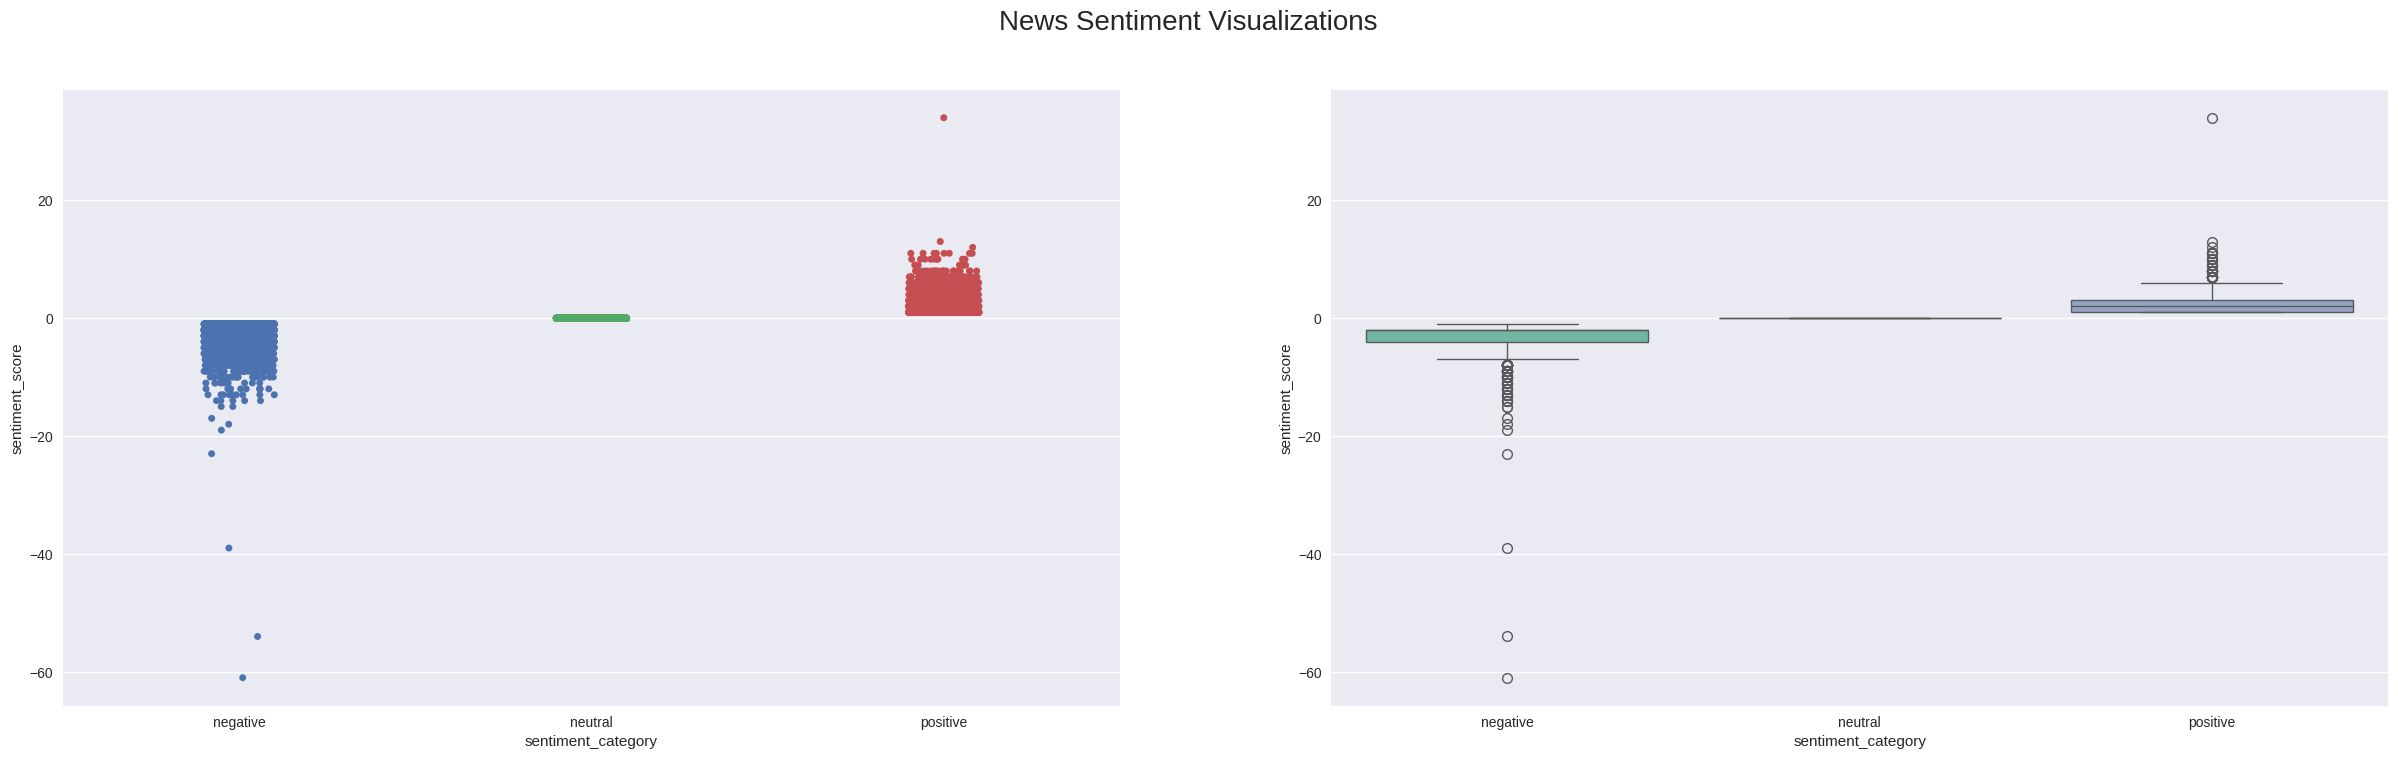

In [56]:
plt.style.use("seaborn")
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 8))
sp = sns.stripplot(x='sentiment_category', y='sentiment_score',
                   hue='sentiment_category', data=dfA, ax=ax1)
bp = sns.boxplot(x='sentiment_category', y='sentiment_score',
                 hue='sentiment_category', data=dfA, palette='Set2', ax=ax2)
t = f.suptitle('News Sentiment Visualizations', fontsize=20)

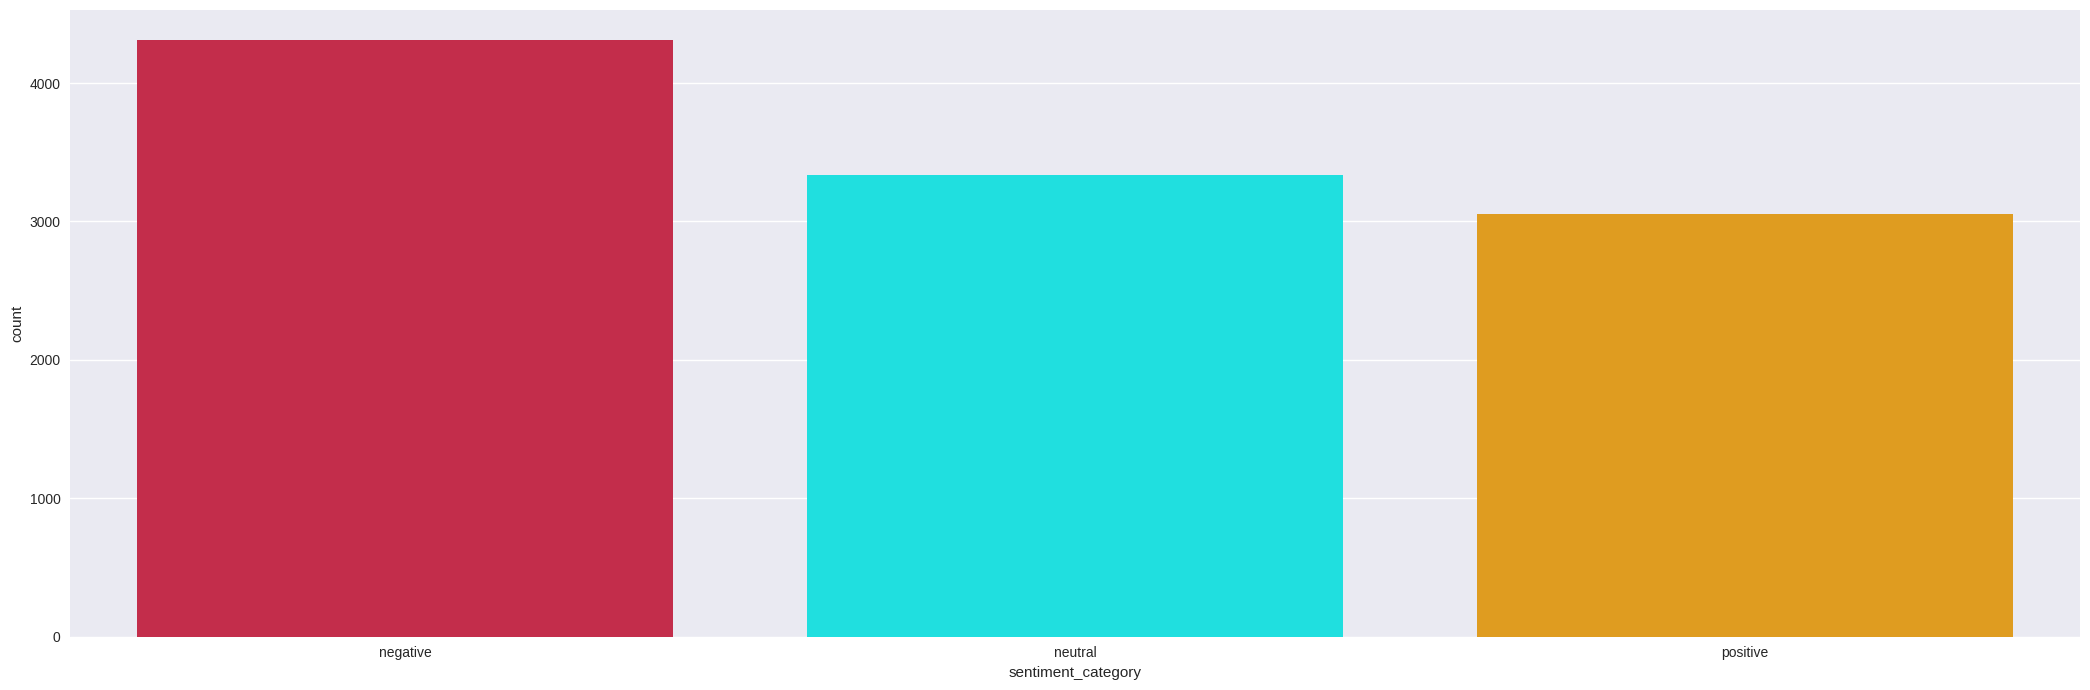

In [57]:
# frequency of sentiment labels
#plt.figure(figsize=(200,20))
fc = sns.catplot(x="sentiment_category", hue="sentiment_category",
                 data=dfA, kind="count",
                 palette={'negative': 'crimson',
                          'positive': 'orange',
                          'neutral': 'aqua'}, height=7, aspect=3)

In [53]:
dfA.to_csv('Afinn Sentiment.csv')